In [23]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
train = pd.read_csv('train.csv')
train = np.array(train)
m, n = train.shape
np.random.shuffle(train)
x_train = train[:, 1:]
x_train = x_train / 255
x_train = x_train.T
y_train = train[:, 0]
y_train = y_train.T

In [3]:

test = pd.read_csv('test.csv')
test = np.array(test)
x_test = test[:, 1:]
y_test = test[:, 0]
x_test = x_test / 255
x_test = x_test.T
y_test = y_test.T

In [4]:
import numpy as np

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp = np.exp(Z - Z.max())
    return exp / np.sum(exp, axis=0)

def cross_entropy_loss(A2, Y):
    loss = np.mean(-np.sum(np.log(A2[Y, np.arange(m)])))
    return loss

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = Y.shape[0]
    
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, initial_alpha, iterations):
    W1, b1, W2, b2 = init_params()
    alpha = initial_alpha
    
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        loss = cross_entropy_loss(A2, Y)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 1000 == 0:
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(f"Iteration: {i}, Loss: {loss}, Accuracy: {accuracy}")
        

        alpha = initial_alpha / (1 + i * 0.001)
    
    return W1, b1, W2, b2



In [8]:

W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.1, 50000)

Iteration: 0, Loss: 27648.980400740315, Accuracy: 0.10425
Iteration: 1000, Loss: 18398.32337125889, Accuracy: 0.105
Iteration: 2000, Loss: 18289.289789785733, Accuracy: 0.1105
Iteration: 3000, Loss: 18100.22738229465, Accuracy: 0.15275
Iteration: 4000, Loss: 17902.526459086723, Accuracy: 0.162625
Iteration: 5000, Loss: 17755.491123204825, Accuracy: 0.169125
Iteration: 6000, Loss: 17631.6074158122, Accuracy: 0.180375
Iteration: 7000, Loss: 17540.727427606005, Accuracy: 0.1835
Iteration: 8000, Loss: 17477.141726172493, Accuracy: 0.188625
Iteration: 9000, Loss: 17429.416964718763, Accuracy: 0.193625
Iteration: 10000, Loss: 17391.8297413427, Accuracy: 0.193875
Iteration: 11000, Loss: 17359.530003039836, Accuracy: 0.195125
Iteration: 12000, Loss: 17332.43874914864, Accuracy: 0.198
Iteration: 13000, Loss: 17307.51989561232, Accuracy: 0.19875
Iteration: 14000, Loss: 17284.881922402466, Accuracy: 0.197375
Iteration: 15000, Loss: 17265.1027770976, Accuracy: 0.199875
Iteration: 16000, Loss: 1724

In [32]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

    
def test_prediction(index, W1, b1, W2, b2):    
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image =x_test[:, index, None]
    prediction = make_predictions(x_test[:, index, None], W1, b1, W2, b2)
    label = y_test[index]
    print("Prediction: ",map[prediction[0]])
    print("Label: ", map[label])
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  marge simpson
Label:  marge simpson


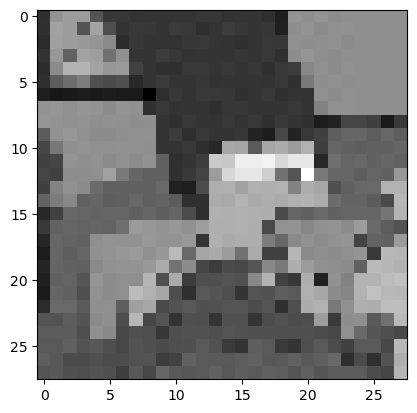

Prediction:  principal skinner
Label:  charles montgomery_burns


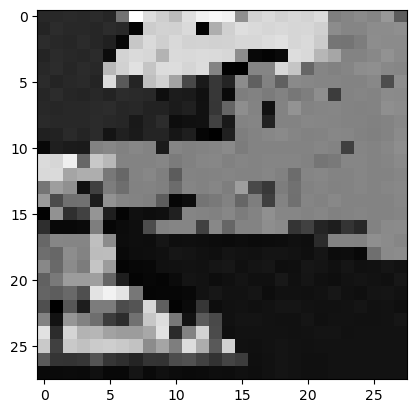

Prediction:  moe szyslak
Label:  bart simpson


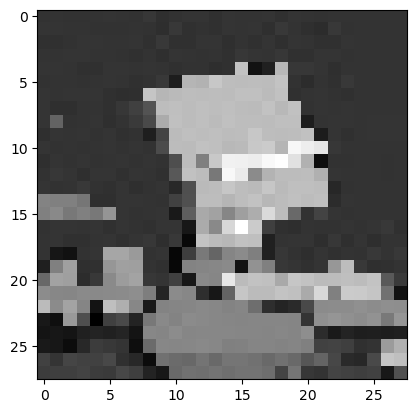

Prediction:  ned flanders
Label:  krusty the clown


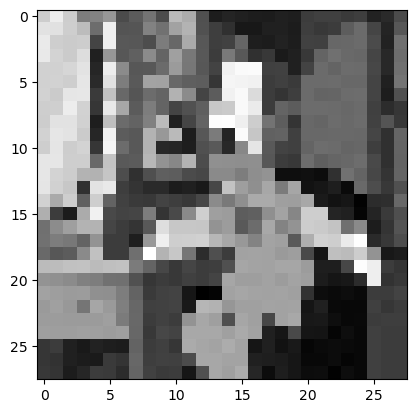

In [37]:

test_prediction(1000,W1, b1, W2, b2)
test_prediction(100, W1, b1, W2, b2)
test_prediction(1500, W1, b1, W2, b2)
test_prediction(800, W1, b1, W2, b2)